## Sathwik                                         Assignment-4 Salary data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from math import sqrt


import warnings
warnings.filterwarnings('ignore')

In [2]:
sd = pd.read_csv('Salary_Data.csv')
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Making Necessary EDA For The Model

In [3]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
sd.shape

(30, 2)

In [5]:
sd.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
sd.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [10]:
sd = sd.rename({'YearsExperience':'ye','Salary':'s'},axis=1)
sd.head()

,ye,s
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='Salary Data', ylabel='Frequency'>

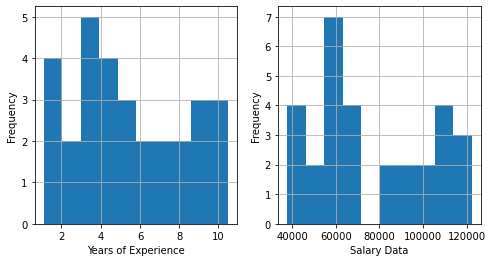

In [12]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
sd['ye'].hist()

plt.subplot(1,2,2)
plt.xlabel('Salary Data')
plt.ylabel('Frequency')
sd['s'].hist()

<AxesSubplot:xlabel='s', ylabel='Density'>

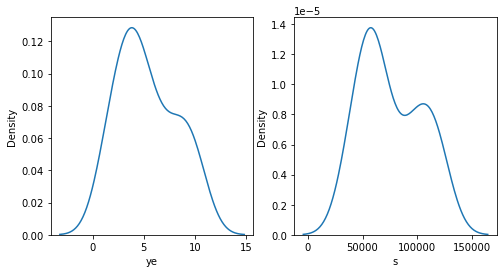

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.distplot(sd['ye'],hist =False)
plt.subplot(1,2,2)
sns.distplot(sd['s'],hist = False)

In [18]:
sd.skew()

ye    0.37956
s     0.35412
dtype: float64

In [19]:
sd.kurtosis()

ye   -1.012212
s    -1.295421
dtype: float64

##  Building Various Models

#### Model1: Building the model without applying any transformation 

In [17]:
model1 = smf.ols('s~ye', data=sd).fit()
model1

<AxesSubplot:xlabel='ye', ylabel='s'>

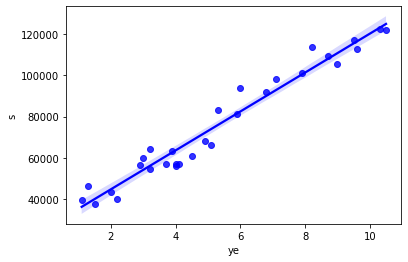

In [20]:
sns.regplot(x='ye',y='s',data=sd,color='blue')

In [21]:
model1.params

Intercept    25792.200199
ye            9449.962321
dtype: float64

In [22]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept    11.346940
ye           24.950094
dtype: float64 
 Intercept    5.511950e-12
ye           1.143068e-20
dtype: float64


In [23]:
model1.rsquared,model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      s   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        22:21:55   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
pred1 = model1.predict(sd.ye)
pred1.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [27]:
actual_data = sd.s
actual_data

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: s, dtype: float64

In [30]:
root1 =sqrt(mean_squared_error(pred1,actual_data))
root1

5592.043608760662

### Model 2: Building the Model by applying log transformation

In [31]:
model2 = smf.ols('s~np.log(ye)', data=sd).fit()
model2

<AxesSubplot:xlabel='ye', ylabel='s'>

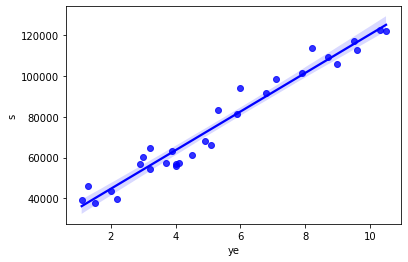

In [32]:
sns.regplot(x='ye',y='s',data=sd,color='blue')

In [33]:
model2.params

Intercept     14927.97177
np.log(ye)    40581.98796
dtype: float64

In [34]:
print(model2.tvalues, '\n', model2.pvalues)

Intercept      2.895135
np.log(ye)    12.791989
dtype: float64 
 Intercept     7.268813e-03
np.log(ye)    3.250155e-13
dtype: float64


In [35]:
model2.rsquared,model2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

model2.summary()

In [37]:
pred2 = model2.predict(sd.ye)
pred2.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

In [38]:
root2 =sqrt(mean_squared_error(pred2,actual_data))
root2

10302.893706228308

###  Model 3: Building th model by Applying Exponential Transformation

In [39]:
model3 = smf.ols('s~np.exp(ye)', data=sd).fit()
model3

<AxesSubplot:xlabel='ye', ylabel='s'>

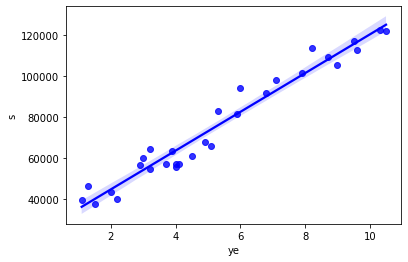

In [40]:
sns.regplot(x='ye',y='s',data=sd,color='blue')

In [41]:
model3.params

Intercept     67568.624969
np.exp(ye)        2.136040
dtype: float64

In [42]:
print(model3.tvalues, '\n', model3.pvalues)

Intercept     16.620427
np.exp(ye)     5.006889
dtype: float64 
 Intercept     4.888835e-16
np.exp(ye)    2.721588e-05
dtype: float64


In [43]:
model3.rsquared,model3.rsquared_adj

(0.47238440560728734, 0.45354099152183325)

model3.summary()

In [45]:
pred3 = model3.predict(sd.ye)
pred3.head()

0    67575.041989
1    67576.462735
2    67578.198038
3    67584.408291
4    67587.902762
dtype: float64

In [47]:
root3 =sqrt(mean_squared_error(pred3,actual_data))
root3

19578.364073775414

### Model4: Building the model by applying reciprocal trasformation

In [48]:
model4 = smf.ols('s~np.reciprocal(ye)', data=sd).fit()
model4

<AxesSubplot:xlabel='ye', ylabel='s'>

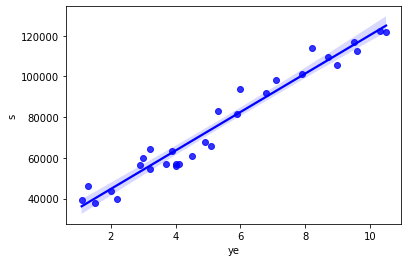

In [49]:
sns.regplot(x='ye',y='s',data=sd,color='blue')

In [50]:
model4.params

Intercept            104273.335111
np.reciprocal(ye)   -103620.843905
dtype: float64

In [51]:
print(model4.tvalues, '\n', model4.pvalues)

Intercept            18.842323
np.reciprocal(ye)    -6.329255
dtype: float64 
 Intercept            1.926358e-17
np.reciprocal(ye)    7.581006e-07
dtype: float64


In [52]:
model4.rsquared,model4.rsquared_adj

(0.5885951068932687, 0.5739020749965996)

model4.summary()

In [55]:
pred4 = model4.predict(sd.ye)
pred4.head()

0    10072.567925
1    24564.993646
2    35192.772508
3    52462.913159
4    57172.951518
dtype: float64

In [56]:
root4 =sqrt(mean_squared_error(pred4,actual_data))
root4

17288.30098984632

### Model 5: Building the model by applying squareroot transformation

In [60]:
model5 = smf.ols('s~np.sqrt(ye)', data=sd).fit()
model5

<AxesSubplot:xlabel='ye', ylabel='s'>

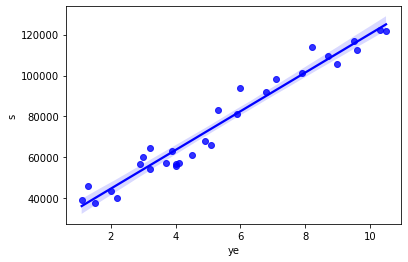

In [61]:
sns.regplot(x='ye',y='s',data=sd,color='blue')

In [62]:
model5.params

Intercept     -16055.769117
np.sqrt(ye)    41500.680583
dtype: float64

In [63]:
print(model5.tvalues, '\n', model5.pvalues)

Intercept      -3.262308
np.sqrt(ye)    19.437148
dtype: float64 
 Intercept      2.906965e-03
np.sqrt(ye)    8.565358e-18
dtype: float64


In [64]:
model5.rsquared,model5.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

In [65]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      s   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           8.57e-18
Time:                        22:39:16   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(ye)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
pred5 = model5.predict(sd.ye)
pred5.head()

0    27470.511884
1    31262.287009
2    34771.976586
3    42635.056211
4    45499.687794
dtype: float64

In [67]:
root5 =sqrt(mean_squared_error(pred5,actual_data))
root5

7080.09573498304

### Insights Drawn: 
>By Comparing all the Five models its assured that model1 is better to predict the Salary because the model1 has better Rsquare and Adjusted Rsquare value compared to other models and even the RMSE value is also less.